# Importing necessary libraries


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading the dataset and printing top 5 rows


In [2]:
df = pd.read_csv(r"C:\Users\FAUZAN\Downloads\creditcard_2023.csv\creditcard_2023.csv")
print("Dataset Sample:\n", df.head())

Dataset Sample:
    id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27      

# Checking the class distribution 

In [3]:
# Check class distribution
class_counts = df['Class'].value_counts()
print("\nClass distribution:")
print(class_counts)

# Percentage distribution for clarity
class_percent = df['Class'].value_counts(normalize=True) * 100
print("\nClass distribution (percentage):")
print(class_percent)


Class distribution:
Class
0    284315
1    284315
Name: count, dtype: int64

Class distribution (percentage):
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


# Splitting features and target variable


In [4]:
X = df.drop('Class', axis=1)
y = df['Class']
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (568630, 30)
Target Shape: (568630,)


# Now doing training,testing, split and scalling the features


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a dictionary of models, and then training and evalutating the each model

In [6]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', scale_pos_weight=(y == 0).sum() / (y == 1).sum(), random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy of {name}: {accuracy:.3f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix
    }
    results[name] = accuracy




Training Logistic Regression...
Accuracy of Logistic Regression: 0.998
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56805    58]
 [  137 56726]]

Training XGBoost...
Accuracy of XGBoost: 1.000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56857     6]
 [   20 56843]]

Training Decision Tree...
Accuracy of Decision Tree: 1.000
Classification Rep

# Plotting ROC curve for all models

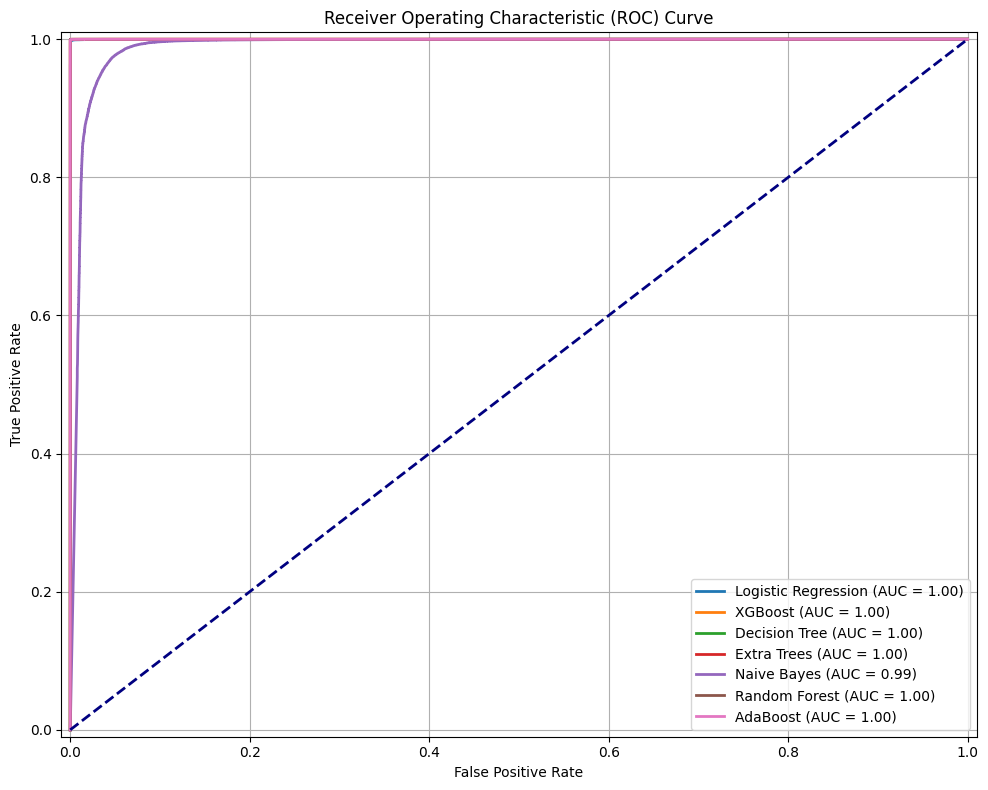

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# First, compute and plot ROC curves for all models
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test_scaled)
    else:
        continue  # Skip models that can't produce a probability-like score

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# Plotting Confusion Matrix for all models


Plotting Confusion Matrix for Logistic Regression...


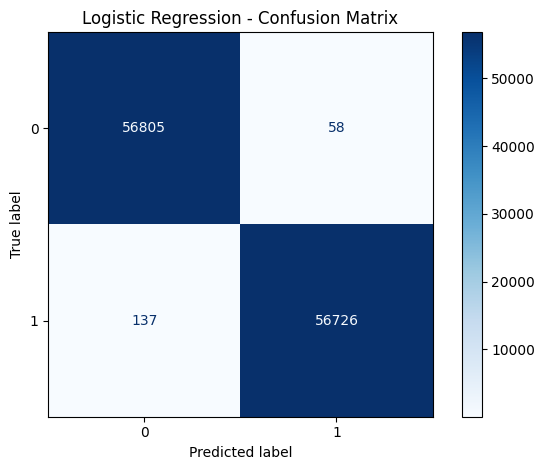


Plotting Confusion Matrix for XGBoost...


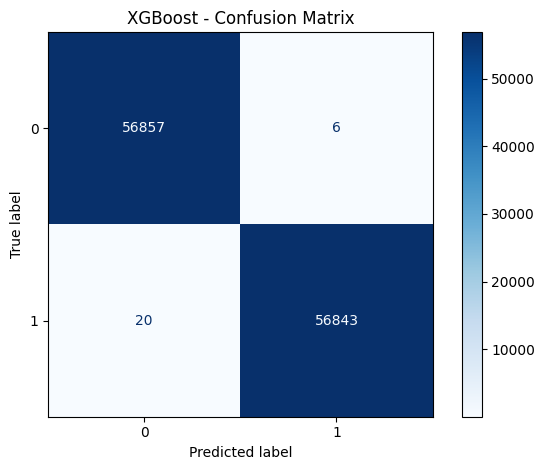


Plotting Confusion Matrix for Decision Tree...


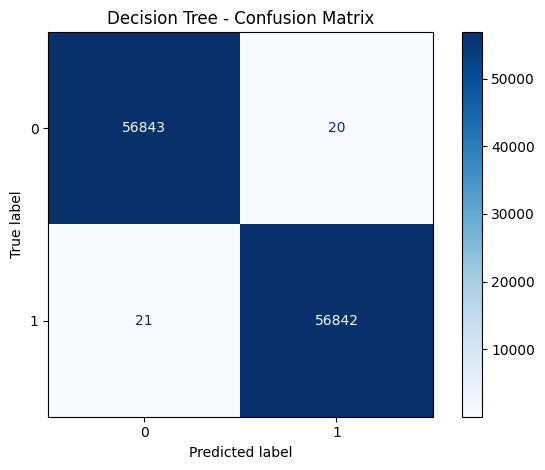


Plotting Confusion Matrix for Extra Trees...


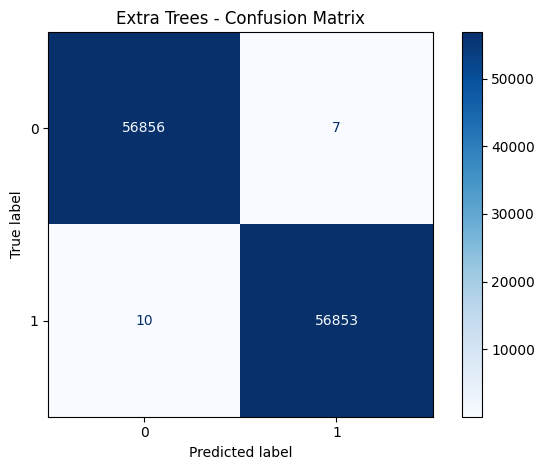


Plotting Confusion Matrix for Naive Bayes...


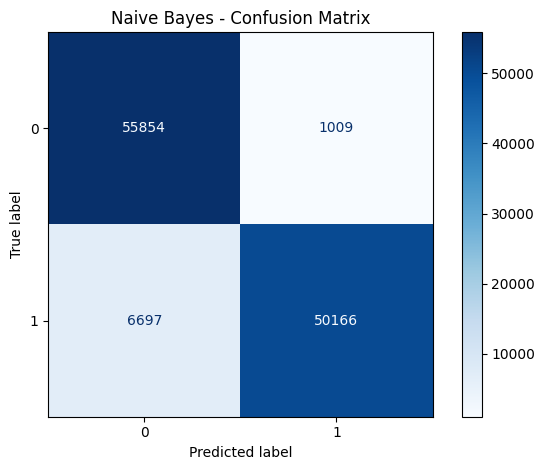


Plotting Confusion Matrix for Random Forest...


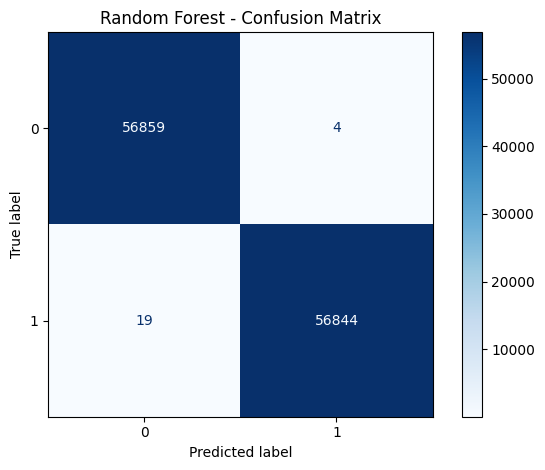


Plotting Confusion Matrix for AdaBoost...


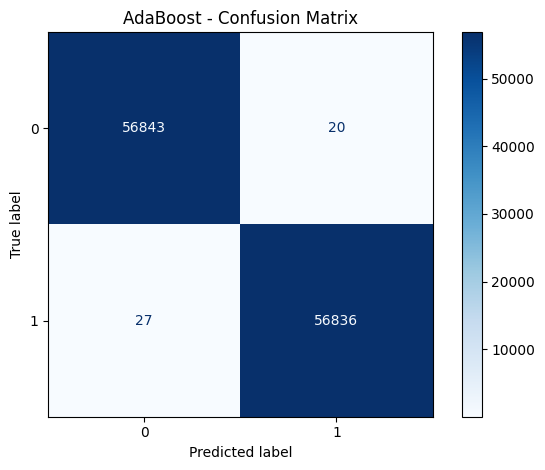

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    print(f"\nPlotting Confusion Matrix for {name}...")
    
    y_pred = model.predict(X_test_scaled)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()


# Plotting Precision, Recall, and F1-score for all models


Plotting Precision, Recall, and F1-score for Logistic Regression...


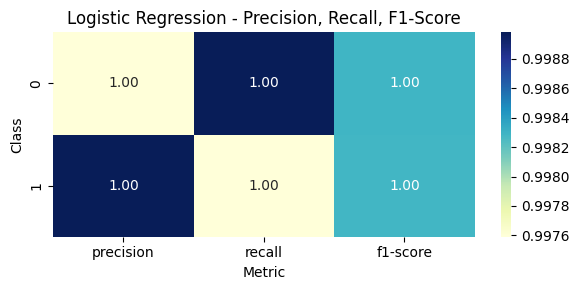


Plotting Precision, Recall, and F1-score for XGBoost...


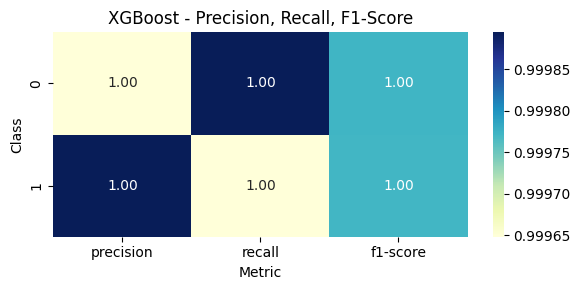


Plotting Precision, Recall, and F1-score for Decision Tree...


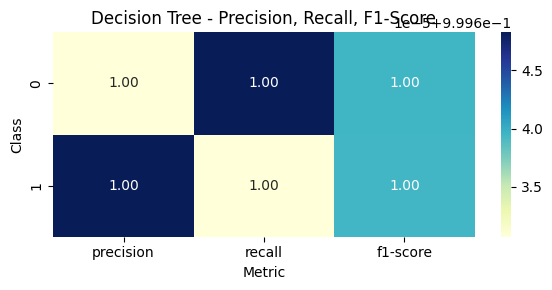


Plotting Precision, Recall, and F1-score for Extra Trees...


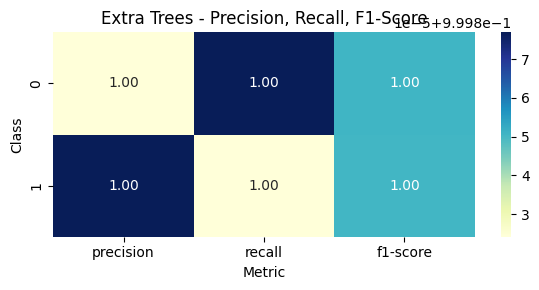


Plotting Precision, Recall, and F1-score for Naive Bayes...


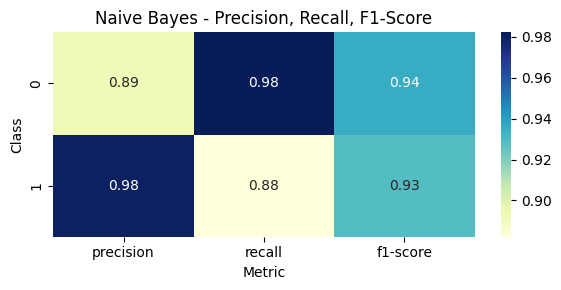


Plotting Precision, Recall, and F1-score for Random Forest...


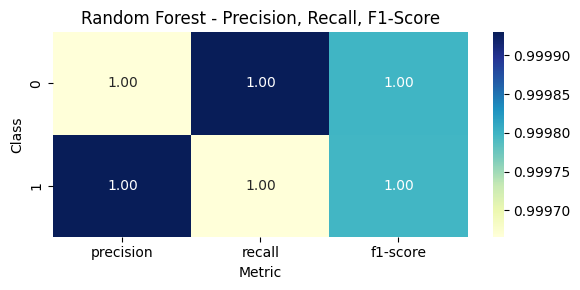


Plotting Precision, Recall, and F1-score for AdaBoost...


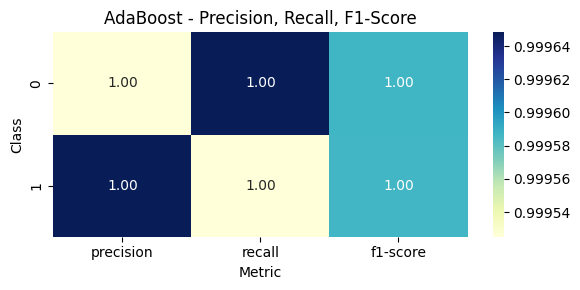

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

for name, model in models.items():
    print(f"\nPlotting Precision, Recall, and F1-score for {name}...")

    y_pred = model.predict(X_test_scaled)
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    
    
    report_df = pd.DataFrame(report_dict).T.loc[['0', '1'], ['precision', 'recall', 'f1-score']]

    plt.figure(figsize=(6, 3))
    sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f"{name} - Precision, Recall, F1-Score")
    plt.ylabel("Class")
    plt.xlabel("Metric")
    plt.tight_layout()
    plt.show()


# Printing best performance model

In [10]:
best_model = max(results, key=results.get)
print("\n\nBest Performing Model is:", best_model, "with Accuracy:", f"{results[best_model]:.2f}")



Best Performing Model is: Extra Trees with Accuracy: 1.00
